# ER-ACE tests

ER-ACE is a Continual Learning method which exploits Replay to deal with forgetting. In particular it uses two different loss for samples coming from the buffer and current data from the training set. Moreover, it use a masking technique to exclude already seen classes from the incoming data loss, avoiding the perturbation of their learned representation. <br>
<br>
This notebook contains the results of the tests done using the CIFAR-10 dataset. Experiments were taken with and without the use of on the fly augmentations, varying the size of the buffer (5, 20, 50 and 100 samples per class). For each experiment, a grid search was performed over three possible values of learning rate: 0.1, 0.01, 0.001.

In [3]:
import torch
import logging
from utils import *

In [4]:
cifar10_ntask = 5
aug_flag = False
batch_size = 10
rehearsal_batch_size = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
logging.getLogger("fvcore").setLevel(logging.ERROR)
logging.getLogger("matplotlib").setLevel(logging.ERROR)

CIFAR-10 contains images of 32x32 pixels in RGB from ten categories. The training set contains 50000 images, 5000 for each class.<br>
In the cells below, images with and without the effect of the augmentations are compared

100%|██████████| 170M/170M [00:04<00:00, 34.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


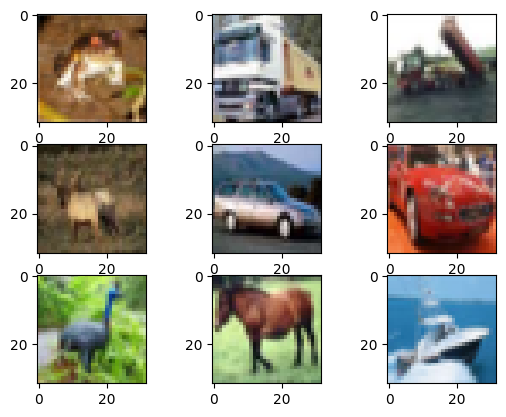

In [5]:
from torchvision import datasets

benchmark_cifar10 = datasets.CIFAR10(root='./data', download=True)
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  image = benchmark_cifar10.data[i]
  plt.imshow(image)
plt.show()

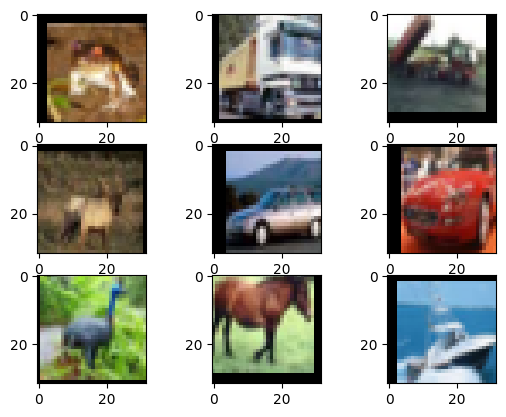

In [6]:
from dataset import transform

for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  image = benchmark_cifar10.data[i]
  image = transform(image)
  plt.imshow(image.squeeze(0).permute(1, 2, 0))
plt.show()

## Model memory usage and FLOPs count per sample

In [7]:
model_bits_occupacy(len(benchmark_cifar10.classes), True);

Bits used for the model: 35031680


In [8]:
count_flops(len(benchmark_cifar10.classes), device, True);

FLOPs per sample: 55.58176


## CIFAR-10 experiments

In [9]:
# Per visualizzare i risultati finali
# 4 valori per M, sia con uso di augmentation che senza

acc = [[0.0] * 4, [0.0] * 4]
fgt = [[0.0] * 4, [0.0] * 4]
aaa = [[0.0] * 4, [0.0] * 4]

In [10]:
training_dataset, val_dataset = prepare_datasets(cifar10=True)

Files already downloaded and verified


### M = 5

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 35.7600
lr = 0.01, final accuracy = 36.0000
lr = 0.001, final accuracy = 29.0400

Best learning rate = 0.01

Final Results

avg_acc: 36.0000
avg_fgt: 30.2000
avg_anytime_acc: 56.7100
metrics: buffer_n_bits: 1228850


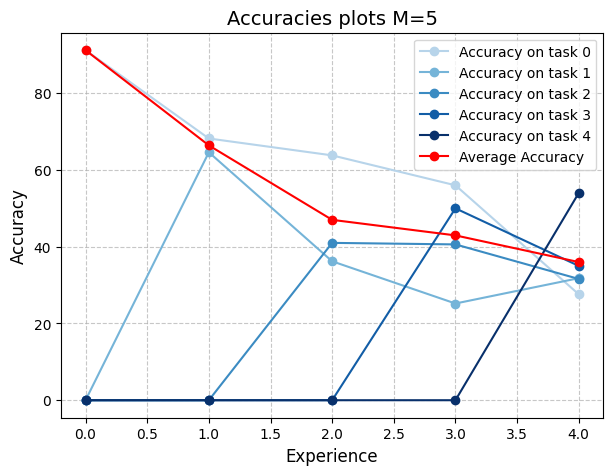

In [12]:
(acc[0][0], fgt[0][0], aaa[0][0]), accuracies = experiment(5, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar10_ntask,
                                                           aug_flag, device, False)
plot_results(5, np.array(accuracies).T)

### M = 20

Training with grid search on learning rate ([0.1, 0.01, 0.001])


learning rate = 0.1:

Task 0:

Time 20.86

Validation Results:	 92	0	0	0	0 	Avg Acc: 92.20


Task 1:

Time 19.64

Validation Results:	 74	68	0	0	0 	Avg Acc: 71.60


Task 2:

Time 21.12

Validation Results:	 74	31	53	0	0 	Avg Acc: 52.73


Task 3:

Time 20.76

Validation Results:	 73	35	34	63	0 	Avg Acc: 51.70


Task 4:

Time 20.39

Validation Results:	 37	27	52	50	44 	Avg Acc: 42.32

lr = 0.1, final accuracy = 42.3200


learning rate = 0.01:

Task 0:

Time 20.35

Validation Results:	 91	0	0	0	0 	Avg Acc: 91.40


Task 1:

Time 19.63

Validation Results:	 78	59	0	0	0 	Avg Acc: 68.70


Task 2:

Time 20.83

Validation Results:	 76	30	60	0	0 	Avg Acc: 55.53


Task 3:

Time 20.09

Validation Results:	 74	20	43	62	0 	Avg Acc: 50.35


Task 4:

Time 20.56

Validation Results:	 42	23	41	54	46 	Avg Acc: 41.44

lr = 0.01, final accuracy = 41.4400


learning rate = 0.001:

Task 0:

Time 20.10

Validation Results:	 88	0	0	0	0 	Avg Acc:

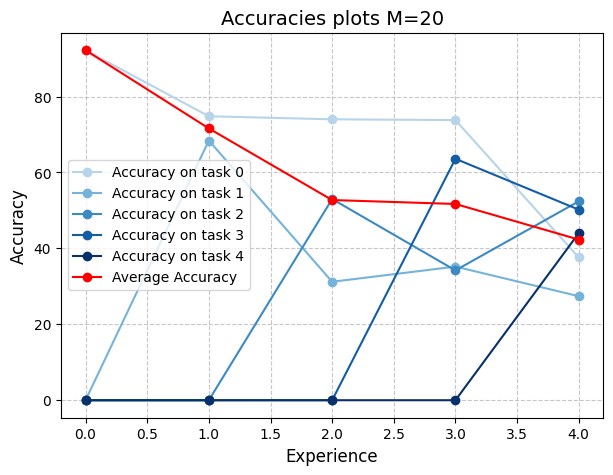

In [14]:
(acc[0][1], fgt[0][1], aaa[0][1]), accuracies = experiment(20, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar10_ntask,
                                                           aug_flag, device, True)
plot_results(20, np.array(accuracies).T)

### M = 50

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 48.3200
lr = 0.01, final accuracy = 46.6800
lr = 0.001, final accuracy = 36.8000

Best learning rate = 0.1

Final Results

avg_acc: 48.3200
avg_fgt: 23.7000
avg_anytime_acc: 65.1540
metrics: buffer_n_bits: 12288500


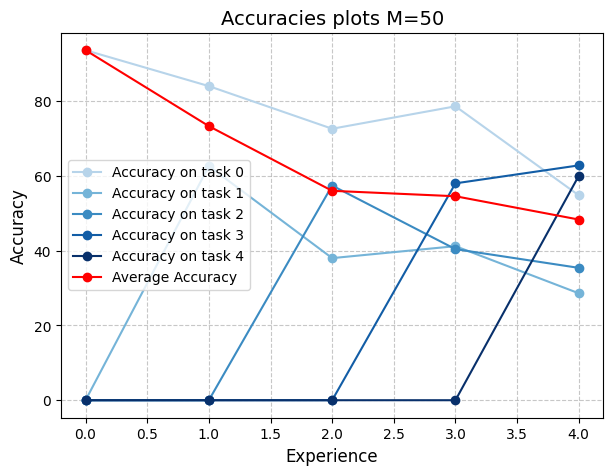

In [15]:
(acc[0][2], fgt[0][2], aaa[0][2]), accuracies = experiment(50, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar10_ntask,
                                                           aug_flag, device, False)
plot_results(50, np.array(accuracies).T)

### M = 100

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 51.0000
lr = 0.01, final accuracy = 49.2400
lr = 0.001, final accuracy = 42.8000

Best learning rate = 0.1

Final Results

avg_acc: 51.0000
avg_fgt: 18.5000
avg_anytime_acc: 65.9333
metrics: buffer_n_bits: 24577000


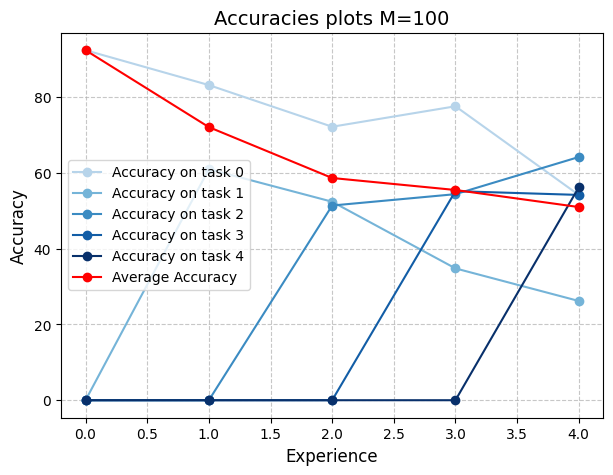

In [16]:
(acc[0][3], fgt[0][3], aaa[0][3]), accuracies = experiment(100, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar10_ntask,
                                                           aug_flag, device, False)
plot_results(100, np.array(accuracies).T)

## Experiments with augmentations

In [25]:
aug_flag = True

### M = 5

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 30.8400
lr = 0.01, final accuracy = 35.0000
lr = 0.001, final accuracy = 24.4800

Best learning rate = 0.01

Final Results

avg_acc: 35.0000
avg_fgt: 27.6500
avg_anytime_acc: 55.8400
metrics: buffer_n_bits: 1228850


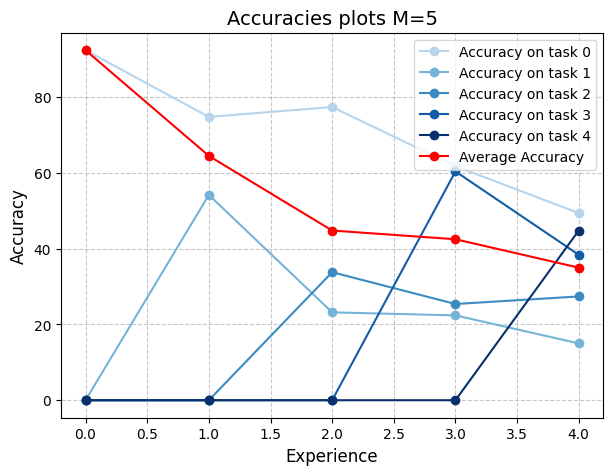

In [23]:
(acc[1][0], fgt[1][0], aaa[1][0]), accuracies = experiment(5, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar10_ntask,
                                                           aug_flag, device, False)
plot_results(5, np.array(accuracies).T)

### M = 20

Training with grid search on learning rate ([0.1, 0.01, 0.001])


learning rate = 0.1:

Task 0:

Time 26.37

Validation Results:	 85	0	0	0	0 	Avg Acc: 85.00


Task 1:

Time 26.65

Validation Results:	 76	51	0	0	0 	Avg Acc: 64.20


Task 2:

Time 26.68

Validation Results:	 52	20	58	0	0 	Avg Acc: 43.87


Task 3:

Time 27.17

Validation Results:	 60	25	42	56	0 	Avg Acc: 46.35


Task 4:

Time 27.55

Validation Results:	 40	19	35	40	50 	Avg Acc: 37.24

lr = 0.1, final accuracy = 37.2400


learning rate = 0.01:

Task 0:

Time 26.07

Validation Results:	 90	0	0	0	0 	Avg Acc: 90.80


Task 1:

Time 26.43

Validation Results:	 77	64	0	0	0 	Avg Acc: 70.90


Task 2:

Time 26.65

Validation Results:	 76	21	65	0	0 	Avg Acc: 54.20


Task 3:

Time 27.03

Validation Results:	 64	19	42	65	0 	Avg Acc: 48.00


Task 4:

Time 27.50

Validation Results:	 36	21	32	63	59 	Avg Acc: 42.68

lr = 0.01, final accuracy = 42.6800


learning rate = 0.001:

Task 0:

Time 26.69

Validation Results:	 86	0	0	0	0 	Avg Acc:

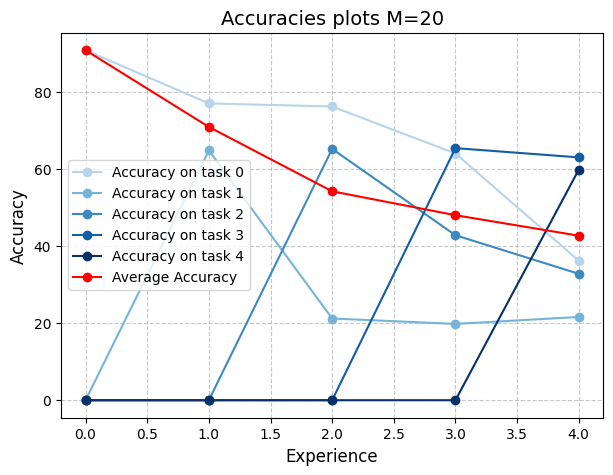

In [19]:
(acc[1][1], fgt[1][1], aaa[1][1]), accuracies = experiment(20, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar10_ntask,
                                                           aug_flag, device, True)
plot_results(20, np.array(accuracies).T)

### M = 50

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 47.9200
lr = 0.01, final accuracy = 44.1600
lr = 0.001, final accuracy = 33.2000

Best learning rate = 0.1

Final Results

avg_acc: 47.9200
avg_fgt: 25.3500
avg_anytime_acc: 64.0107
metrics: buffer_n_bits: 12288500


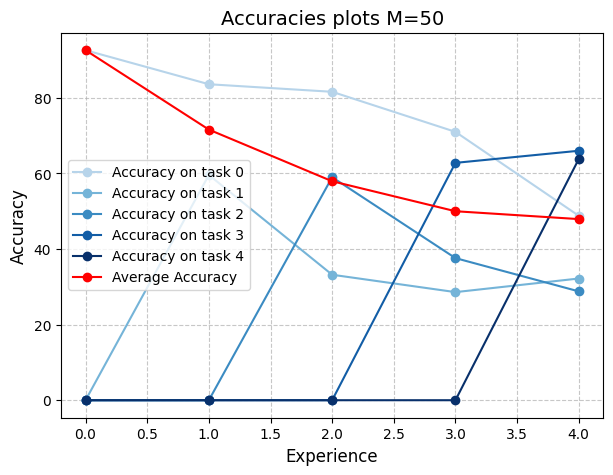

In [28]:
(acc[1][2], fgt[1][2], aaa[1][2]), accuracies = experiment(50, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar10_ntask,
                                                           aug_flag, device, False)
plot_results(50, np.array(accuracies).T)

### M = 100

Training with grid search on learning rate ([0.1, 0.01, 0.001])
lr = 0.1, final accuracy = 51.8400
lr = 0.01, final accuracy = 49.4400
lr = 0.001, final accuracy = 38.9200

Best learning rate = 0.1

Final Results

avg_acc: 51.8400
avg_fgt: 18.7000
avg_anytime_acc: 67.5347
metrics: buffer_n_bits: 24577000


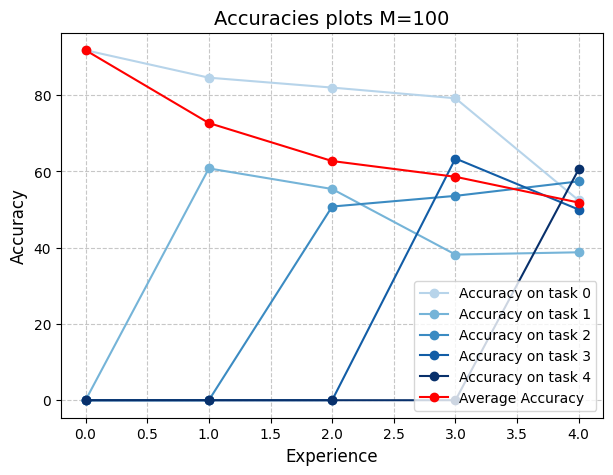

In [21]:
(acc[1][3], fgt[1][3], aaa[1][3]), accuracies = experiment(100, training_dataset, val_dataset,
                                                           batch_size, rehearsal_batch_size, cifar10_ntask,
                                                           aug_flag, device, False)
plot_results(100, np.array(accuracies).T)

## Results

In [29]:
import pandas as pd

# Visualizzazione dei risultati

def create_table(M_values, acc, fgt, aaa, dataset_name):
  for lst in [acc, fgt, aaa]:
    if not all(len(sublist) == len(M_values) for sublist in lst) or len(lst) != 2:
      print("Dimensioni delle liste dei risultati errate")

  # Dizionario per la tabella
  results = {
    "Metric": [
        "ACC (no aug)", "ACC (aug)",
        "FGT (no aug)", "FGT (aug)",
        "AAA (no aug)", "AAA (aug)",
    ]
  }

  for i, M in enumerate(M_values):
    results[f"M={M}"] = [
      acc[0][i], acc[1][i],  # Accuracy no aug e aug
      fgt[0][i], fgt[1][i],  # Forgetting no aug e aug
      aaa[0][i], aaa[1][i],  # Anytime Accuracy no aug e aug
    ]

  return pd.DataFrame(results)


cifar10_table = create_table([5, 20, 50, 100], acc, fgt, aaa, "CIFAR-10")
display(cifar10_table)

,Metric,M=5,M=20,M=50,M=100
0,ACC (no aug),36.00,42.320000,48.320000,51.000000
1,ACC (aug),35.00,42.680000,47.920000,51.840000
2,FGT (no aug),30.20,27.400000,23.700000,18.500000
3,FGT (aug),27.65,33.150000,25.350000,18.700000
4,AAA (no aug),56.71,62.110667,65.154000,65.933333
5,AAA (aug),55.84,61.316000,64.010667,67.534667
